In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)


In [3]:
def check_NaN(data):
    # Select only numeric columns for spline interpolation
    numeric_columns = data.select_dtypes(include=[np.number]).columns

    print("Number of NaN values:\n", data[numeric_columns].isna().sum())
    
def count_missing_coumns_by_month(df, columns):
    df['Date'] = pd.to_datetime(df['Date'])
    df['YearMonth'] = df ['Date'].dt.to_period('M')
    
    missing_counts = df.groupby('YearMonth')[columns].apply(lambda x: x.isnull().sum())
    
    missing_counts = missing_counts[(missing_counts > 0).any(axis=1)]
    
    print("Number of missing values by month and yr where any column is null:")
    print(missing_counts)
    
def exact_missing_date(df, column):
    if column not in df.columns:
        print(f"Column {column} does not exist in the dataframe.")
        return
    
    null_dates = df[df[column].isna()]["Date"].unique()
    
    if len(null_dates) == 0:
        print(f"No missing dates found in column {column}.")
    else:
        print(f"Missing values for {column} are in the following dates:")
        for date in null_dates:
            print(date)
def print_date_range(data):
    """
    Function to print the earliest and latest dates in the 'Date' column of a DataFrame.
    
    Parameters:
    data (pd.DataFrame): The input DataFrame containing a 'Date' column.
    """
    # Ensure the 'Date' column is in datetime format
    data['Date'] = pd.to_datetime(data['Date'], errors='coerce')

    # Drop any rows where 'Date' could not be converted to a valid datetime
    data = data.dropna(subset=['Date'])

    # Find the earliest and latest dates
    earliest_date = data['Date'].min()
    latest_date = data['Date'].max()

    # Print the results
    print(f"Earliest Date: {earliest_date}")
    print(f"Latest Date: {latest_date}")

In [4]:
# Define the date range
# "2024-07-01 00:00" "2024-07-30 23:00"
start_date = "2024-07-01 00:00"
end_date = "2024-08-15 23:00"


In [5]:
# Load original data
original_data = pd.read_csv("../../DATAFORMODELtrain200824.csv")

# Convert 'Date' column to datetime format
original_data['Date'] = pd.to_datetime(original_data['Date'], errors='coerce').dt.round('h')

In [18]:
extract_features = pd.read_csv("../Prophet/features_for_Prophet.csv")

In [19]:
# Get column names with specific prefixes
filtered_column_names = extract_features.columns[extract_features.columns.str.startswith(('rolling_mean_', 'lag_', 'ema_'))]

print(filtered_column_names.tolist())

['rolling_mean_3h', 'lag_1', 'rolling_mean_6h', 'ema_12h', 'lag_24', 'ema_24h', 'lag_168', 'rolling_mean_24h', 'lag_3', 'rolling_mean_12h', 'rolling_mean_168h', 'ema_168h', 'lag_48', 'lag_72', 'lag_6', 'lag_12']


In [20]:
check_NaN(extract_features)

Number of NaN values:
 rolling_mean_3h      8786
lag_1                8784
rolling_mean_6h      8789
ema_12h                 0
lag_24               8784
ema_24h                 0
lag_168              8784
rolling_mean_24h     8807
lag_3                8784
rolling_mean_12h     8795
GAS                  8784
COAL                 8784
rolling_mean_168h    8951
ema_168h                0
lag_48               8784
PMIHU                8784
CO2                  8784
UNAVGASRO            8784
COALTOGAS            8784
lag_72               8784
UNAVGASHU            8784
UNAVTPPBG            8784
UNAVGASALL           8784
rolling_std_168h     8951
UNAVTPPRO            8784
lag_6                8784
UNAVTPPHU            8784
lag_12               8784
UNAVTPPGR            8784
UNAVLIGNRO           8784
UNAVHYDRALL          8784
rolling_std_24h      8807
UNAVGASGR            8784
Y                    8784
UNAVLIGNBG           8784
SOLMAX               8784
UNAVNUCALL           8784
UNAVHYDRBG     

In [21]:
len(extract_features)

75720

In [22]:
print_date_range(extract_features)

Earliest Date: 2017-01-01 00:00:00
Latest Date: 2024-08-20 23:00:00


In [23]:
extract_features.head()

,rolling_mean_3h,lag_1,rolling_mean_6h,ema_12h,lag_24,ema_24h,lag_168,rolling_mean_24h,lag_3,rolling_mean_12h,GAS,COAL,rolling_mean_168h,ema_168h,lag_48,PMIHU,CO2,UNAVGASRO,COALTOGAS,lag_72,UNAVGASHU,UNAVTPPBG,UNAVGASALL,rolling_std_168h,UNAVTPPRO,lag_6,UNAVTPPHU,lag_12,UNAVTPPGR,UNAVLIGNRO,UNAVHYDRALL,rolling_std_24h,UNAVGASGR,Y,UNAVLIGNBG,SOLMAX,UNAVNUCALL,UNAVHYDRBG,UNAVNUCFR,UNAVTPPCZ,UNAVLIGNCZ,T2MALLPCO2,UNAVTPPSL,UNAVLIGNSL,UA_HU,UNAVLIGNALL,UNAVGASCZ,rolling_std_12h,UA_EU,UNAVHYDRFR,T2MALLMAX,UNAVTPPALL,T2MALLMIN,rolling_std_6h,RORDE_HP,UNAVALLFR,UNAVNUCCZ,PL_SK,UNAVGASBG,RORDE,Date,PriceHU
0,NaN,NaN,NaN,57.250000,NaN,57.250000,NaN,NaN,NaN,NaN,18.75,90.1,NaN,57.250000,NaN,52.2,4.59,1037.0,4.805333,NaN,218.0,0.0,2102.0,NaN,3658.0,NaN,305.0,NaN,831.0,2511.0,361.0,NaN,0.0,2017.0,0.0,426.0,470.0,0.0,8665.0,3560.0,2169.0,39.8412,787.0,787.0,508.0,5554.0,847.0,NaN,528.0,3308.0,0.596667,8310.0,-6.566667,NaN,2835.148013,11973.0,470.0,0.0,0.0,2595.0,2017-01-01 00:00:00,57.25
1,NaN,57.25,NaN,53.436667,NaN,53.583333,NaN,NaN,NaN,NaN,18.75,90.1,NaN,53.709048,NaN,52.2,4.59,502.0,4.805333,NaN,287.0,0.0,789.0,NaN,2688.0,NaN,374.0,NaN,831.0,1881.0,361.0,NaN,0.0,2017.0,0.0,426.0,470.0,0.0,8665.0,2000.0,1625.0,39.3822,787.0,787.0,508.0,4380.0,0.0,NaN,528.0,3308.0,0.596667,5959.0,-6.566667,NaN,2776.036637,11973.0,470.0,50.0,0.0,2661.0,2017-01-01 01:00:00,50.21
2,50.500000,50.21,NaN,49.769145,NaN,50.133603,NaN,NaN,NaN,NaN,18.75,90.1,NaN,50.447587,NaN,52.2,4.59,502.0,4.805333,NaN,218.0,0.0,720.0,NaN,2688.0,NaN,305.0,NaN,831.0,1881.0,361.0,NaN,0.0,2017.0,0.0,426.0,470.0,0.0,8665.0,2006.0,1631.0,39.5658,787.0,787.0,519.0,4386.0,0.0,NaN,539.0,3308.0,0.596667,5896.0,-6.566667,NaN,2724.866331,11973.0,470.0,50.0,0.0,2657.0,2017-01-01 02:00:00,44.04
3,42.353333,44.04,NaN,44.415806,NaN,45.246954,NaN,NaN,57.25,NaN,18.75,90.1,NaN,45.959140,NaN,52.2,4.59,502.0,4.805333,NaN,218.0,0.0,720.0,NaN,2688.0,NaN,218.0,NaN,831.0,1881.0,361.0,NaN,0.0,2017.0,0.0,426.0,470.0,0.0,8665.0,2006.0,1631.0,39.7188,787.0,787.0,519.0,4299.0,0.0,NaN,539.0,3308.0,0.596667,5809.0,-6.566667,NaN,2683.314660,11973.0,470.0,50.0,0.0,2608.0,2017-01-01 03:00:00,32.81
4,35.086667,32.81,NaN,40.067086,NaN,41.295991,NaN,NaN,50.21,NaN,18.75,90.1,NaN,42.365250,NaN,52.2,4.59,502.0,4.805333,NaN,218.0,0.0,720.0,NaN,2688.0,NaN,218.0,NaN,831.0,1881.0,361.0,NaN,0.0,2017.0,0.0,426.0,470.0,0.0,8665.0,2006.0,1631.0,39.2139,787.0,787.0,519.0,4299.0,0.0,NaN,539.0,3308.0,0.596667,5809.0,-6.566667,NaN,2652.380525,11973.0,470.0,50.0,0.0,2594.0,2017-01-01 04:00:00,28.41


In [24]:
# Filter original data for the specified date range
original_data_filtered = original_data[(original_data['Date'] >= start_date) & (original_data['Date'] <= end_date)]

In [28]:
# Load forecasted results
forecasted_data = pd.read_csv("../Prophet/prophet_forecast.csv")

# Convert 'ds' (Date) column to datetime format
forecasted_data['ds'] = pd.to_datetime(forecasted_data['ds'], errors='coerce').dt.round('h')

# Filter forecasted data for the specified date range
forecasted_data_filtered = forecasted_data[(forecasted_data['ds'] >= start_date) & (forecasted_data['ds'] <= end_date)]


In [29]:
forecasted_data.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,CO2,CO2_lower,CO2_upper,CO2_x_COALTOGAS,CO2_x_COALTOGAS_lower,CO2_x_COALTOGAS_upper,CO2_x_UNAVGASALL,CO2_x_UNAVGASALL_lower,CO2_x_UNAVGASALL_upper,CO2_x_UNAVGASHU,CO2_x_UNAVGASHU_lower,CO2_x_UNAVGASHU_upper,CO2_x_UNAVGASRO,CO2_x_UNAVGASRO_lower,CO2_x_UNAVGASRO_upper,CO2_x_UNAVTPPBG,CO2_x_UNAVTPPBG_lower,CO2_x_UNAVTPPBG_upper,CO2_x_UNAVTPPRO,CO2_x_UNAVTPPRO_lower,CO2_x_UNAVTPPRO_upper,COAL,COAL_lower,COAL_upper,COALTOGAS,COALTOGAS_lower,COALTOGAS_upper,COALTOGAS_x_UNAVGASALL,COALTOGAS_x_UNAVGASALL_lower,COALTOGAS_x_UNAVGASALL_upper,COALTOGAS_x_UNAVGASHU,COALTOGAS_x_UNAVGASHU_lower,COALTOGAS_x_UNAVGASHU_upper,COALTOGAS_x_UNAVGASRO,COALTOGAS_x_UNAVGASRO_lower,COALTOGAS_x_UNAVGASRO_upper,COALTOGAS_x_UNAVTPPBG,COALTOGAS_x_UNAVTPPBG_lower,COALTOGAS_x_UNAVTPPBG_upper,COALTOGAS_x_UNAVTPPRO,COALTOGAS_x_UNAVTPPRO_lower,COALTOGAS_x_UNAVTPPRO_upper,COAL_x_CO2,COAL_x_CO2_lower,COAL_x_CO2_upper,COAL_x_COALTOGAS,COAL_x_COALTOGAS_lower,COAL_x_COALTOGAS_upper,COAL_x_PMIHU,COAL_x_PMIHU_lower,COAL_x_PMIHU_upper,COAL_x_UNAVGASALL,COAL_x_UNAVGASALL_lower,COAL_x_UNAVGASALL_upper,COAL_x_UNAVGASHU,COAL_x_UNAVGASHU_lower,COAL_x_UNAVGASHU_upper,COAL_x_UNAVGASRO,COAL_x_UNAVGASRO_lower,COAL_x_UNAVGASRO_upper,COAL_x_UNAVTPPBG,COAL_x_UNAVTPPBG_lower,COAL_x_UNAVTPPBG_upper,COAL_x_UNAVTPPRO,COAL_x_UNAVTPPRO_lower,COAL_x_UNAVTPPRO_upper,GAS,GAS_lower,GAS_upper,GAS_x_CO2,GAS_x_CO2_lower,GAS_x_CO2_upper,GAS_x_COAL,GAS_x_COAL_lower,GAS_x_COAL_upper,GAS_x_COALTOGAS,GAS_x_COALTOGAS_lower,GAS_x_COALTOGAS_upper,GAS_x_PMIHU,GAS_x_PMIHU_lower,GAS_x_PMIHU_upper,GAS_x_UNAVGASALL,GAS_x_UNAVGASALL_lower,GAS_x_UNAVGASALL_upper,GAS_x_UNAVGASHU,GAS_x_UNAVGASHU_lower,GAS_x_UNAVGASHU_upper,GAS_x_UNAVGASRO,GAS_x_UNAVGASRO_lower,GAS_x_UNAVGASRO_upper,GAS_x_UNAVTPPBG,GAS_x_UNAVTPPBG_lower,GAS_x_UNAVTPPBG_upper,GAS_x_UNAVTPPRO,GAS_x_UNAVTPPRO_lower,GAS_x_UNAVTPPRO_upper,PL_SK,PL_SK_lower,PL_SK_upper,PMIHU,PMIHU_lower,PMIHU_upper,PMIHU_x_CO2,PMIHU_x_CO2_lower,PMIHU_x_CO2_upper,PMIHU_x_COALTOGAS,PMIHU_x_COALTOGAS_lower,PMIHU_x_COALTOGAS_upper,PMIHU_x_UNAVGASALL,PMIHU_x_UNAVGASALL_lower,PMIHU_x_UNAVGASALL_upper,PMIHU_x_UNAVGASHU,PMIHU_x_UNAVGASHU_lower,PMIHU_x_UNAVGASHU_upper,PMIHU_x_UNAVGASRO,PMIHU_x_UNAVGASRO_lower,PMIHU_x_UNAVGASRO_upper,PMIHU_x_UNAVTPPBG,PMIHU_x_UNAVTPPBG_lower,PMIHU_x_UNAVTPPBG_upper,PMIHU_x_UNAVTPPRO,PMIHU_x_UNAVTPPRO_lower,PMIHU_x_UNAVTPPRO_upper,RORDE,RORDE_lower,RORDE_upper,RORDE_HP,RORDE_HP_lower,RORDE_HP_upper,SOLMAX,SOLMAX_lower,SOLMAX_upper,T2MALLMAX,T2MALLMAX_lower,T2MALLMAX_upper,T2MALLMIN,T2MALLMIN_lower,T2MALLMIN_upper,T2MALLPCO2,T2MALLPCO2_lower,T2MALLPCO2_upper,UA_EU,UA_EU_lower,UA_EU_upper,UA_HU,UA_HU_lower,UA_HU_upper,UNAVALLFR,UNAVALLFR_lower,UNAVALLFR_upper,UNAVGASALL,UNAVGASALL_lower,UNAVGASALL_upper,UNAVGASALL_x_UNAVTPPRO,UNAVGASALL_x_UNAVTPPRO_lower,UNAVGASALL_x_UNAVTPPRO_upper,UNAVGASBG,UNAVGASBG_lower,UNAVGASBG_upper,UNAVGASCZ,UNAVGASCZ_lower,UNAVGASCZ_upper,UNAVGASGR,UNAVGASGR_lower,UNAVGASGR_upper,UNAVGASHU,UNAVGASHU_lower,UNAVGASHU_upper,UNAVGASHU_x_UNAVGASALL,UNAVGASHU_x_UNAVGASALL_lower,UNAVGASHU_x_UNAVGASALL_upper,UNAVGASHU_x_UNAVTPPBG,UNAVGASHU_x_UNAVTPPBG_lower,UNAVGASHU_x_UNAVTPPBG_upper,UNAVGASHU_x_UNAVTPPRO,UNAVGASHU_x_UNAVTPPRO_lower,UNAVGASHU_x_UNAVTPPRO_upper,UNAVGASRO,UNAVGASRO_lower,UNAVGASRO_upper,UNAVGASRO_x_UNAVGASALL,UNAVGASRO_x_UNAVGASALL_lower,UNAVGASRO_x_UNAVGASALL_upper,UNAVGASRO_x_UNAVGASHU,UNAVGASRO_x_UNAVGASHU_lower,UNAVGASRO_x_UNAVGASHU_upper,UNAVGASRO_x_UNAVTPPBG,UNAVGASRO_x_UNAVTPPBG_lower,UNAVGASRO_x_UNAVTPPBG_upper,UNAVGASRO_x_UNAVTPPRO,UNAVGASRO_x_UNAVTPPRO_lower,UNAVGASRO_x_UNAVTPPRO_upper,UNAVHYDRALL,UNAVHYDRALL_lower,UNAVHYDRALL_upper,UNAVHYDRBG,UNAVHYDRBG_lower,UNAVHYDRBG_upper,UNAVHYDRFR,UNAVHYDRFR_lower,UNAVHYDRFR_upper,UNAVLIGNALL,UNAVLIGNALL_lower,UNAVLIGNALL_upper,UNAVLIGNBG,UNAVLIGNBG_lower,UNAVLIGNBG_upper,UNAVLIGNCZ,UNAVLIGNCZ_lower,UNAVLIGNCZ_upper,UNAVLIGNRO,UNAVLIGNRO_lower,UNAVLIGNRO_upper,UNAVLIGNSL,UNAVLIGNSL_lower,UNAVLIGNSL_upper,UN

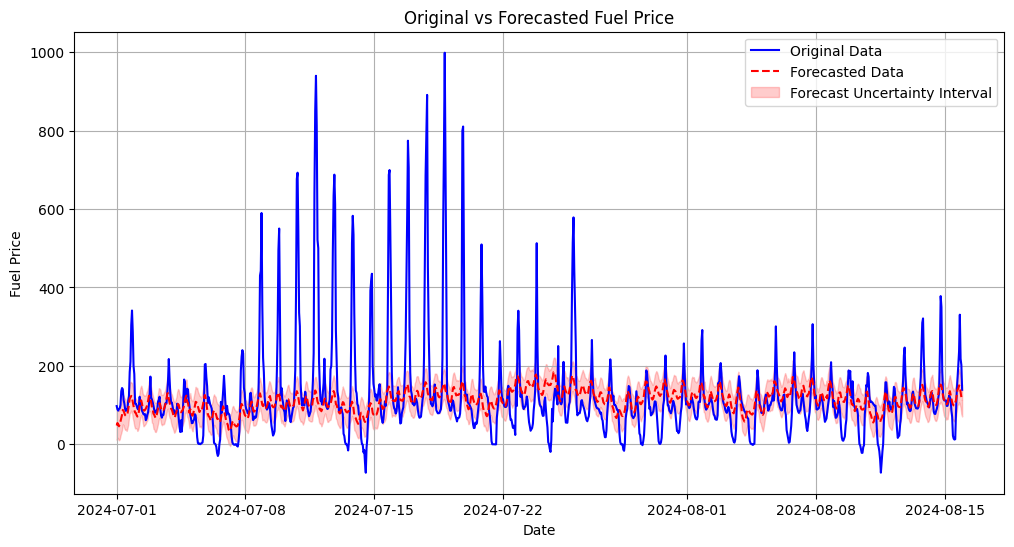

In [30]:
# Plot the original and forecasted results
plt.figure(figsize=(12, 6))
plt.plot(original_data_filtered['Date'], original_data_filtered['PriceHU'], label='Original Data', color='blue')
plt.plot(forecasted_data_filtered['ds'], forecasted_data_filtered['yhat'], label='Forecasted Data', color='red', linestyle='--')

# Plot additional forecast uncertainty intervals if needed
if 'yhat_lower' in forecasted_data.columns and 'yhat_upper' in forecasted_data.columns:
    plt.fill_between(forecasted_data_filtered['ds'], 
                     forecasted_data_filtered['yhat_lower'], 
                     forecasted_data_filtered['yhat_upper'], 
                     color='red', alpha=0.2, label='Forecast Uncertainty Interval')

plt.xlabel('Date')
plt.ylabel('Fuel Price')
plt.title('Original vs Forecasted Fuel Price')
plt.legend()
plt.grid(True)
plt.show()